# Fake News Detection

Content:

1.Introduction

2.Data Collection

3.Data Preprocessing 

4.Data Modelling 

5.Conclusion

6.Reference

### Introduction

 Most of the smart phone users prefer to read the news via social media over internet. The news websites are publishing the news and provide  the  source  of  authentication.  The question  is  how  to  authenticate  the  news  and articles which are circulated among social media like WhatsApp groups, Facebook Pages, Twitter and other micro blogs & social networking sites. It  is harmful  for the  society to  believe  on the rumors and pretend to be a news. The need of an hour  is  to  stop  the  rumors  especially  in  the developing countries like India, and focus on the correct, authenticated  news  articles. 

### Data Collection

#### We are Using Dataset Fake News Detection 
https://www.kaggle.com/competitions/fake-news/data?select=train.csv

### About the Dataset

### Steps we are following

###### New Data --> Data Preposcessing --> Test/Train --> Run the Model

###### New Data --> Trained  teh model  --> Fake New or Real new Prediction  

### About the Dataset

1. id: unique id for a news article
2. title: the title of a news article 
3. author: author of news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake.

    1: Fake news
    
    0: Real News

### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
#from sklearn.feature_extraction.text import TfidVectorizer

[nltk_data] Downloading package stopwords to C:\Users\KRUTIKA
[nltk_data]     RAJPURE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Data Pre-processing

Loading the dataset in jupyter notebook for the process.


In [3]:
data=pd.read_csv('Fakenewtrain.csv')

In [4]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


From  the below data preprocessing we can observe that this dataset contains information about news title , author and text. The dataset consists of 5 features including the label that marks whether the news article is real or fake. Data Analysis is carried
out.

There are 20800 number of rows on further analysis we can understand that there are null values in the data set. There are 2 integer data type features which is id and label and others title,author and text are object data type. The memory of this data set is 812 KB. 

For null values in the features we are replacing it with empty string. Thus we can start are further analysis.

In [5]:
data.shape

(20800, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
#replacing the null values with empty string
data=data.fillna('')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


We are creating a new column content where we are merging column author and title.
Further we will separate the label column form the other data in the data set.

In [9]:
#merging the author name and news title
data['content']=data['author']+' '+data['title']

In [10]:
print(data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [11]:
#separating the news details and label
x=data.drop(columns='label',axis=1)
y=data['label']

In [12]:
print("X (Data) \n\n",x)
print("\n Y (Labels) \n\n",y)

X (Data) 

           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                          

We are importing PorterStemmer for processing stemming on the data which is cleaned and pre-processed.

Stemming :

Stemming uses many approaches to reduce a word to its base from whatever inflected form is encountered. It can be simple to develop a stemming algorithm. Some simple algorithms will strip recognized prefixes and suffixes.

Example:
actor,actress,acting --> act

We are doing stemming because when a text is pre-processed for mining purposes, stemming is applied in order to bring words from their current variation to their original root in order to better process the natural language with subsequent steps.

In [13]:
port_stem = PorterStemmer()

In [14]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [15]:
data['content']=data['content'].apply(stemming)

In [16]:
print(data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


After stemming we can will separate our data and label.

In [17]:
#separating the data and the label
#this data we will feed our machine learning model
X=data['content'].values
Y=data['label'].values

In [18]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [19]:
print(Y)

[1 0 1 ... 0 1 1]


In [20]:
Y.shape

(20800,)

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
#coverting the text data to numerical data
#we are using special vectorizer T stands for Term frequency and idf stands for Inverse documenatation frequency 
#so it counts number of times a word is repeting in the documenatation 
#max repetation of words tells that it is importatnt word and assgin a integer to it.
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [23]:
#before X was text now convert to their feature vectors bacsed on the function of tfidf
#thus now we will feed this data to our machine learning model
print(X)

  (0, 15697)	0.28485063562728646
  (0, 13480)	0.2565896679337957
  (0, 8915)	0.3635963806326075
  (0, 8636)	0.29212514087043684
  (0, 7698)	0.24785219520671603
  (0, 7012)	0.21874169089359144
  (0, 4979)	0.233316966909351
  (0, 3795)	0.2705332480845492
  (0, 3603)	0.3598939188262559
  (0, 2962)	0.2468450128533713
  (0, 2485)	0.3676519686797209
  (0, 268)	0.27010124977708766
  (1, 16812)	0.30071745655510157
  (1, 6823)	0.1904660198296849
  (1, 5510)	0.7143299355715573
  (1, 3571)	0.26373768806048464
  (1, 2816)	0.19094574062359204
  (1, 2224)	0.3827320386859759
  (1, 1895)	0.15521974226349364
  (1, 1498)	0.2939891562094648
  (2, 15622)	0.41544962664721613
  (2, 9625)	0.49351492943649944
  (2, 5975)	0.3474613386728292
  (2, 5396)	0.3866530551182615
  (2, 3106)	0.46097489583229645
  :	:
  (20797, 13128)	0.2482526352197606
  (20797, 12350)	0.27263457663336677
  (20797, 12144)	0.24778257724396507
  (20797, 10311)	0.08038079000566466
  (20797, 9593)	0.174553480255222
  (20797, 9523)	0.295420

## Split our X to training and testing data
Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.A train test is the way of structuring your machine learning project so that you can test your hypothesis quickly and inexpensively. Basically it’s a way to divide the training data so that you can try your algorithm to one half and evaluate the result on the other half.A train test split is when you split your data into a training set and a testing set. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set. There are a few different ways to do a train test split, but the most common is to simply split your data into two sets.

In [24]:
# we want to split the data into X_train= 80 training and X_test= 20 testing
# the label for this x train data will be stored in Y train 
# the label for this x test data will be stored in Y test
#if we dont mentioned stratify as Y there is equal proportion as in original data set
#random  state to split the data is same manner
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=2)

# Training The Model:

##  Logistic Regression Model
Binary Classification we will use Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [25]:
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
#accuracy Score on the training data
LogisticRegression_Trainpredict=LogisticRegression_model.predict(X_train)
LogisticRegression_Modeltrain=accuracy_score(LogisticRegression_Trainpredict,Y_train)
#Accuracy on test data is more important as it will give how the model is actually performed 
print('Accuracy Score of the training data:',LogisticRegression_Modeltrain)

Accuracy Score of the training data: 0.9864783653846154


In [27]:
#accuracy Score on the testing data
LogisticRegression_Testpredict=LogisticRegression_model.predict(X_test)
LogisticRegression_Modeltest=accuracy_score(LogisticRegression_Testpredict,Y_test)
#Accuracy on test data is more important as it will give how the model is actually performed 
print('Accuracy Score of the testing data:',LogisticRegression_Modeltest)

Accuracy Score of the testing data: 0.9790865384615385


After building a model we find the accuracy score of testing data and training data which is observed as:

Accuracy Score of the training data: 98 %

Accuracy Score of the testing data: 97 %

##### Making a Predictive System

In [28]:
X_new=X_test[1]

prediction=LogisticRegression_model.predict(X_new)
print(prediction)

if(prediction[0]==0):
    print("The news is Real")
else:
    print("The News is Fake")


[0]
The news is Real


In [29]:
#checking if the values predicted are correct with the with the labels present
print(Y_test[1])

0


We observed that the model is giving us good accuracy, thus we will check if the values we predicted are correct with the label are already present.

In the above code we can see that for the index one we predicted if the news is real or the news is fake.
We can see that the news is a real news and matching it to the label already present it is 0 which means it is real news.

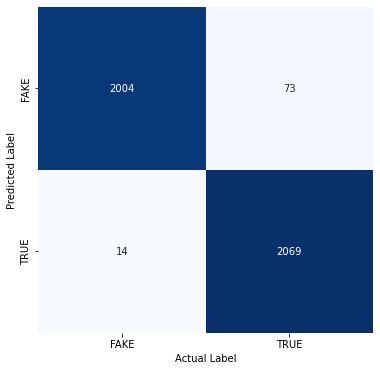

In [30]:
LR_cm = confusion_matrix(Y_test, LogisticRegression_Testpredict)
plt.figure(figsize=(6,6))
sns.heatmap(LR_cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'],
            yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

## Naives_bayes Algorithm

The Naive Bayes algorithm is a classification algorithm that is based on Bayes’ theorem, which is a way of calculating the probability of an event based on its prior knowledge. The algorithm is called “naive” because it makes a simplifying assumption that the features are conditionally independent of each other given the class label.

The Naive Bayes algorithm can be used for binary as well as multi-class classification problems. It is commonly used in text classification tasks, such as spam filtering or sentiment analysis, but it can also be used in other applications where there are multiple classes and multiple features.

In [31]:
NaiveBayes_Model = MultinomialNB()
NaiveBayes_Model.fit(X_train, Y_train)

MultinomialNB()

In [32]:
#accuracy Score on the training data
NaivesBayes_Trainpredict=NaiveBayes_Model.predict(X_train)
NaivesBayes_Modeltrain=accuracy_score(NaivesBayes_Trainpredict,Y_train)
#Accuracy on test data is more important as it will give how the model is actually performed 
print('Accuracy Score of the training data:',NaivesBayes_Modeltrain)

Accuracy Score of the training data: 0.9782451923076924


In [33]:
#accuracy Score on the testing data
NaivesBayes_Testpredict=NaiveBayes_Model.predict(X_test)
NaivesBayes_Modeltest=accuracy_score(NaivesBayes_Testpredict,Y_test)
#Accuracy on test data is more important as it will give how the model is actually performed 
print('Accuracy Score of the testing data:',NaivesBayes_Modeltest)

Accuracy Score of the testing data: 0.9545673076923077


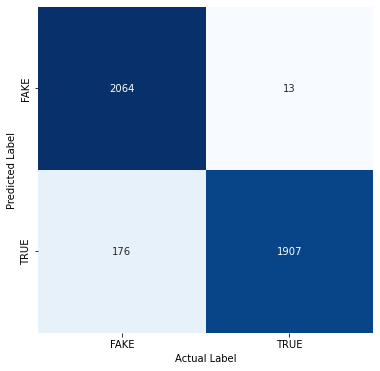

In [34]:
NB_cm = confusion_matrix(Y_test, NaivesBayes_Testpredict)
plt.figure(figsize=(6,6))
sns.heatmap(NB_cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'],
            yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

Form the confusion matrix we can predict that:

2064 fake news are correctly predicated as fake news.

1907 are news which are correctly predicted as True News

13 are True but are predicted as Fake News.


To verfiy we also build naives_bayes algorithm where we can see that the accuracy score of the model is less i.e.

Accuracy Score of the training data: 97%
    
Accuracy Score of the testing data: 95%
176 are Fake News which are predicted as True

## Support vector machines (SVMs)

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

The followings are important concepts in SVM −

Support Vectors − Datapoints that are closest to the hyperplane is called support vectors. Separating line will be defined with the help of these data points.

Hyperplane − As we can see in the above diagram, it is a decision plane or space which is divided between a set of objects having different classes.

Margin − It may be defined as the gap between two lines on the closet data points of different classes. It can be calculated as the perpendicular distance from the line to the support vectors. Large margin is considered as a good margin and small margin is considered as a bad margin.

In [35]:
from sklearn.svm import SVC
 
# Building a Support Vector Machine on train data
SVM_model = SVC(C= .1, kernel='linear', gamma= 1)
SVM_model.fit(X_train, Y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [36]:
#accuracy Score on the training data
SVM_Trainpredict=SVM_model.predict(X_train)
SVM_Modeltrain=accuracy_score(SVM_Trainpredict,Y_train)
#Accuracy on test data is more important as it will give how the model is actually performed 
print('Accuracy Score of the training data:',SVM_Modeltrain)

Accuracy Score of the training data: 0.9557692307692308


In [37]:
#accuracy Score on the testing data
SVM_Testpredict=SVM_model.predict(X_test)
SVM_Modeltest=accuracy_score(SVM_Testpredict,Y_test)
#Accuracy on test data is more important as it will give how the model is actually performed 
print('Accuracy Score of the testing data:',SVM_Modeltest)

Accuracy Score of the testing data: 0.9524038461538461


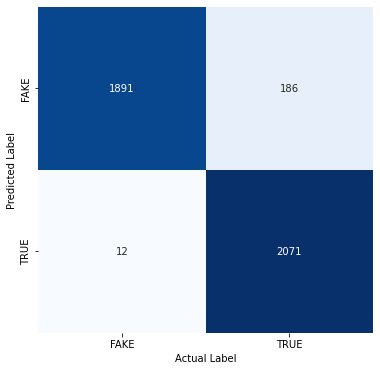

In [38]:
SVM_cm = confusion_matrix(Y_test,SVM_Testpredict )
plt.figure(figsize=(6,6))
sns.heatmap(SVM_cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'],
            yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

# Decision Tree Classification Algorithm

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

### Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualized.
- Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.
- Able to handle multi-output problems.
Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

In [39]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [40]:
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)
DecisionTree_model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer
DecisionTree_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
#accuracy Score on the training data
DecisionTree_Trainpredict=DecisionTree_model.predict(X_train)
DecisionTree_Modeltrain=accuracy_score(DecisionTree_Trainpredict,Y_train)
#Accuracy on test data is more important as it will give how the model is actually performed 
print('Accuracy Score of the training data:',DecisionTree_Modeltrain)

Accuracy Score of the training data: 0.9337139423076923


In [42]:
#accuracy Score on the testing data
DecisionTree_Testpredict=DecisionTree_model.predict(X_test)
DecisionTree_Modeltest=accuracy_score(DecisionTree_Testpredict,Y_test)
#Accuracy on test data is more important as it will give how the model is actually performed 
print('Accuracy Score of the testing data:',DecisionTree_Modeltest)

Accuracy Score of the testing data: 0.932451923076923


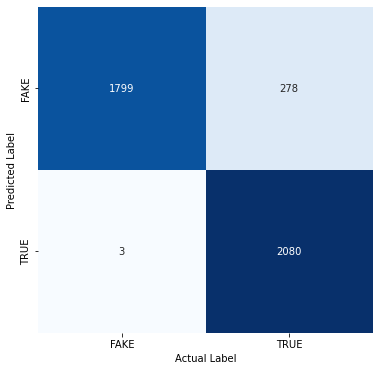

In [44]:
DT_cm=confusion_matrix(Y_test,DecisionTree_Testpredict)
plt.figure(figsize=(6,6))
sns.heatmap(DT_cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

## DECISION TREE VISUALIZATION

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_export.py:677: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


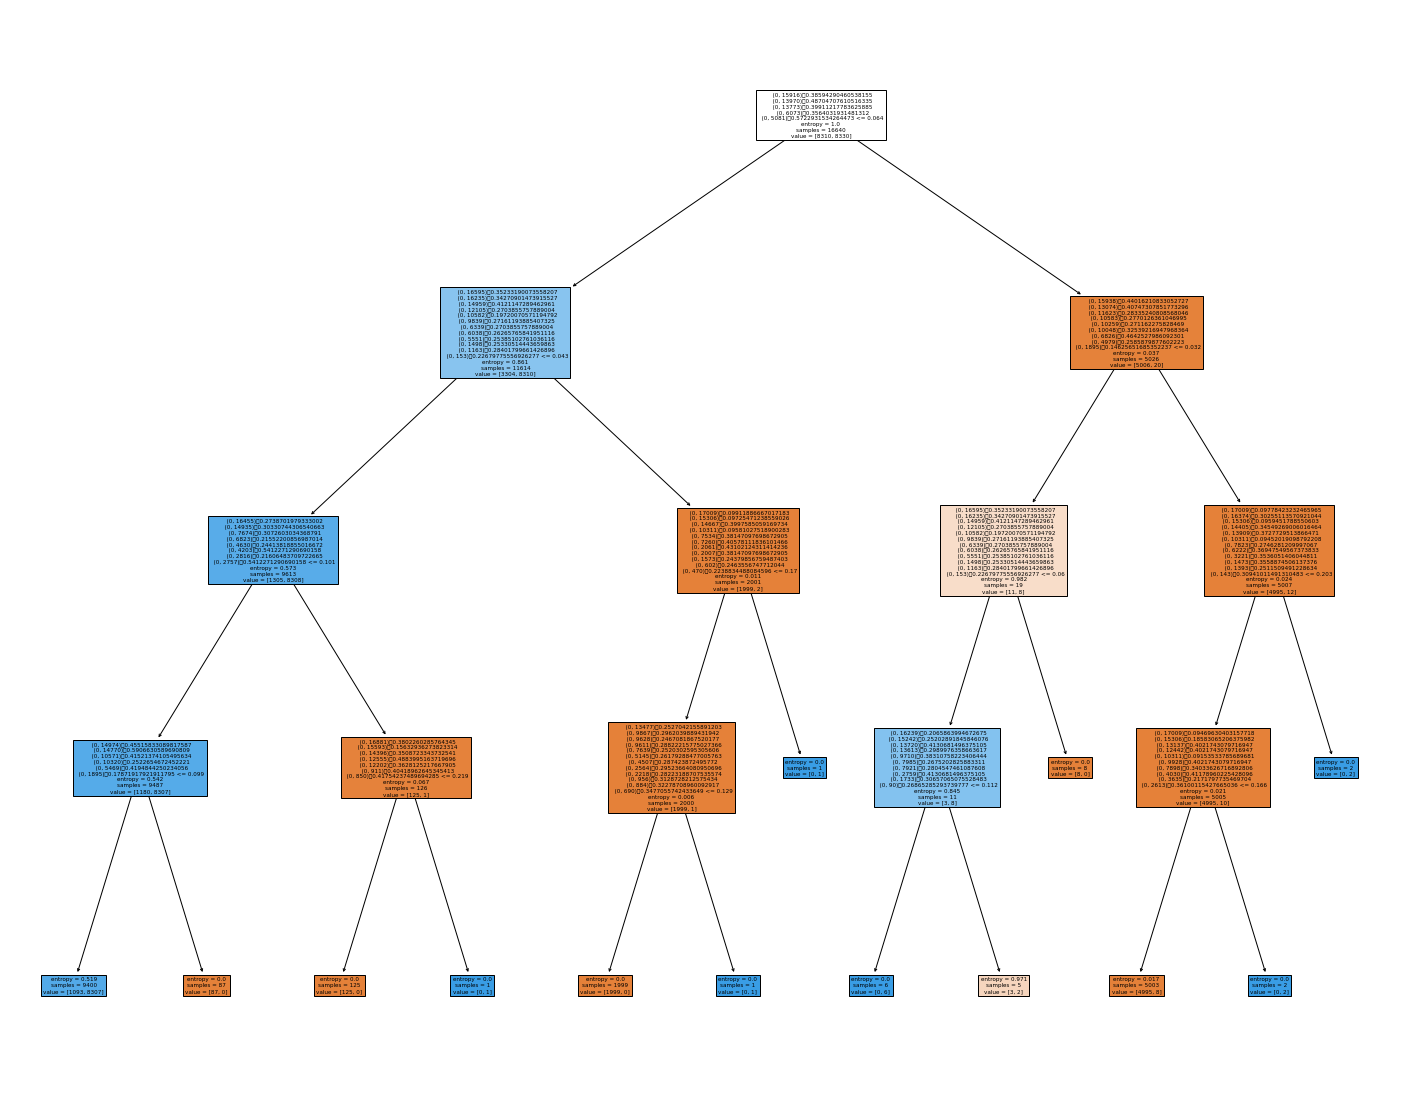

In [45]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DecisionTree_model, 
                   feature_names=X,  
                   filled=True)

## Comparsion with results of Logistic Regression, Naives_bayes , SVM and Decision Tree with Actual Value

In [47]:
from tabulate import tabulate

results=pd.DataFrame({"y_actual":Y_test,"LR":LogisticRegression_Testpredict,
                     "NB":NaivesBayes_Testpredict,"SVM":SVM_Testpredict,"DT":DecisionTree_Testpredict})
results= results.head(15)
print(tabulate(results , headers = ['Actual Values' , ' Logistic Regression' , 
                                    'Naives_bayes','SVM','Decision Tree'] ,
                                     tablefmt = 'pretty', showindex =False))

+---------------+----------------------+--------------+-----+---------------+
| Actual Values |  Logistic Regression | Naives_bayes | SVM | Decision Tree |
+---------------+----------------------+--------------+-----+---------------+
|       1       |          1           |      1       |  1  |       1       |
|       0       |          0           |      0       |  0  |       0       |
|       1       |          1           |      1       |  1  |       1       |
|       0       |          0           |      0       |  0  |       0       |
|       0       |          0           |      0       |  1  |       1       |
|       1       |          1           |      1       |  1  |       1       |
|       0       |          0           |      0       |  0  |       0       |
|       0       |          1           |      0       |  1  |       1       |
|       1       |          1           |      1       |  1  |       1       |
|       1       |          1           |      1       |  1  |   

In [48]:
models = pd.DataFrame({
                          'Model': ['Logistic regression ', 
                                    'Naive Bayes', 
                                    'SVM', 
                                    "Decision Tree",
                                  ],
                       
                          'Scoretrain': [LogisticRegression_Modeltrain,
                                         NaivesBayes_Modeltest,
                                         SVM_Modeltest,
                                         DecisionTree_Modeltest
                                        ],
                       
                             'scoretest':[LogisticRegression_Modeltrain,
                                  
                                          NaivesBayes_Modeltrain,
                                          SVM_Modeltrain,
                                          DecisionTree_Modeltrain
                                          ]})

print(tabulate(models , headers = ['Model' , 'Train' , 'Test'] , tablefmt = 'pretty', showindex =False))

+---------------------+--------------------+--------------------+
|        Model        |       Train        |        Test        |
+---------------------+--------------------+--------------------+
| Logistic regression | 0.9864783653846154 | 0.9864783653846154 |
|     Naive Bayes     | 0.9545673076923077 | 0.9782451923076924 |
|         SVM         | 0.9524038461538461 | 0.9557692307692308 |
|    Decision Tree    | 0.932451923076923  | 0.9337139423076923 |
+---------------------+--------------------+--------------------+


### Conclusion

With this we have built a system. 

We have train the machine learning classifiers to predict whether given news is real news or fake news.
For this task, we have train 4 popular binary classification algorithms 
Logistics Regression, Naive-Bayes, SVM and Decision Tree to predict the fake news. 

After evaluating the performance of all 4 algorithms, we have conclude which among these 4 that Logistics Regression is the best in the task.

### Reference

- GeeksforGeeks. (2022, October 27). Fake News Detection using Machine Learning.
https://www.geeksforgeeks.org/fake-news-detection-using-machine-learning/ 
- Sharma, U. (2021, February 22). Fake News Detection using Machine Learning Algorithms. IJERT.
https://www.ijert.org/fake-news-detection-using-machine-learning-algorithms
- M. B. (2021, December 16). Fake News Detection Using Machine Learning - The Startup. Medium. 
https://medium.com/swlh/fake-news-detection-using-machine-learning-69ff9050351f